# Strong's Bible Dictionary

Python 3 tools for Strong's Bible Dictionary. Data contains both Greek and Hebrew lemmas. Greek starting with *G* and Hebrew with *H*.

Strong's definitions are retrieved and processed from [morphgnt](https://github.com/morphgnt/strongs-dictionary-xml) and [openscriptures](https://github.com/openscriptures/strongs/tree/master/). Few items are corrected and then data is saved as a CSV file. CSV file is a handy format for Python [Pandas](http://pandas.pydata.org/) data processing library. Pandas will be used as a base interface to retrieve the Strong's data.

You need to have a [strongs.csv](https://raw.githubusercontent.com/markomanninen/strongs/master/strongs3/data_processed/strongs.csv) file on your local machine in the same directory with the main script.

In [1]:
import strongs3 as strongs

Retrieving Strong's data from local csv copy (/Users/marko/Documents/notebooks2/strongs3/data_processed/strongs.csv) ...


## Find item by lemma

You can get dictionary items by all five fields: lemma, word, transliteration, translation and isopsephy value. This is done by find function on strongs -module. Example given below retrieves Strong's greek definition G99 from dictionary:

In [2]:
lemma = "G99"
# first argument is search item. second is field name
result = strongs.find(lemma, 'lemma')
# print result using Pandas table output
result

,lemma,word,kjv_def,strongs_def,derivation,transliteration,abnum,word_len
494,G992,βλητεος,must be put,fit to be cast (i.e. applied),from G906 (βάλλω);,blêteos,615,7
638,G993,Βοανεργες,Boanerges,"sons of commotion; Boanerges, an epithet of t...",of Chaldee origin (H01123 and H07266);,Boanerges,436,9
1575,G99,Αδριας,Adria,the Adriatic sea (including the Ionian),from (a place near its shore);,Adrias,316,6
1893,G996,βοηθεια,help,"aid; specially, a rope or chain for frapping ...",from G998 (βοηθός);,boêheia,105,7
2689,G997,βοηθεω,"help, succor",to aid or relieve,from G998 (βοηθός);,boêheô,894,6
3097,G995,βοη,cry,"a halloo, i.e. call (for aid, etc.)",from G994 (βοάω);,boê,80,3
3126,G999,βοθυνος,"ditch, pit","a hole (in the ground); specially, a cistern",akin to G900 (βαθύνω);,bohunos,801,7
4640,G991,βλεπω,"behold, beware, lie, look (on, to), perceive, ...",to look at (literally or figuratively),a primary verb;,blepô,917,5
4876,G998,βοηθος,helper,a succorer,from G995 (βοή) and theo (to run);,boêhos,359,6
4992,G994,βοαω,cry,"to halloo, i.e. shout (for help or in a tumul...",apparently a prolonged form of a primary verb;,boaô,873,4


As you can see, result contains all items having a substring "G99". You can get more limited result by passing search query using [python regular expression](https://docs.python.org/2/library/re.html) engine. 

\$ at the end means searched string must end with given query. Because all lemmas starts with G in Greek Strong's definitions, we don't need to handle beginning part of the search string in this case. But you would do that kind of limit with expression: '^'+lemma+'\$'. Let's get dictionary item with exact lemma:

In [3]:
strongs.find(lemma+'$', 'lemma')

,lemma,word,kjv_def,strongs_def,derivation,transliteration,abnum,word_len
1575,G99,Αδριας,Adria,the Adriatic sea (including the Ionian),from (a place near its shore);,Adrias,316,6


Alternatively you can pass compiled regex object to get item(s) even more efficiently. This is useful especially, if you do a lot of search queries with regular expression style.

In [4]:
import re
regex = re.compile('^'+lemma+'$')
result = strongs.find(regex, 'lemma')
result

,lemma,word,kjv_def,strongs_def,derivation,transliteration,abnum,word_len
1575,G99,Αδριας,Adria,the Adriatic sea (including the Ionian),from (a place near its shore);,Adrias,316,6


Finally, retrieving certain field content is done either by joining array of result item(s), which works well now, because there is only one search result:

In [5]:
print (lemma + ": " + ''.join(result.word))

G99: Αδριας


or by retrieving row by index:

In [6]:
print (lemma + ": " + result.strongs_def[1575])

G99:  the Adriatic sea (including the Ionian)


## Search queries with other fields

### Word

Words stored on the database are simplified greek and hebrew letters without accents/diacritics/masoreths. That's why you may need to preprocess greek words before making a search by a word. To remove unwanted characters and remove accents you can use preprocess method, which is provided by [abnum3](https://github.com/markomanninen/abnum3) module on the strongs library.

Here we are first using "unaccented" word on search:

In [7]:
strongs.find("ψυχρος", 'word')

,lemma,word,kjv_def,strongs_def,derivation,transliteration,abnum,word_len
1861,G5593,ψυχρος,cold,chilly (literally or figuratively),from G5592 (ψύχος);,yuxros,2070,6


And same with preprocessing: 

In [8]:
from strongs3.main import Abnum, greek, hebrew
grc = Abnum(greek)
word = grc.preprocess("ψυχρός")
strongs.find(word, 'word')

,lemma,word,kjv_def,strongs_def,derivation,transliteration,abnum,word_len
1861,G5593,ψυχρος,cold,chilly (literally or figuratively),from G5592 (ψύχος);,yuxros,2070,6


### Translation

Use *kjv_def* or *strongs_def* fields to search from translation of the dictionary words:

In [9]:
strongs.find("flute", 'strongs_def')

,lemma,word,kjv_def,strongs_def,derivation,transliteration,abnum,word_len
565,G836,αυλος,pipe,a flute (as blown),from the same as G109 (ἀήρ);,aulos,701,5
896,G834,αυλητης,"minstrel, piper",a flute-player,from G832 (αὐλέω);,aulêtês,947,7
3621,G832,αυλεω,pipe,to play the flute,from G836 (αὐλός);,auleô,1236,5
8007,H2485,חליל,pipe.,a flute (as perforated),from H2490 (חָלַל);,hlil,78,4
8012,H2490,חלל,"begin ([idiom] men began), defile, [idiom] bre...","properly, to bore, i.e. (by implication) to wo...",a primitive root (compare H2470 (חָלָה)); also...,hll,68,3
10677,H5155,נחילה,(plural) Nehiloth.,a flute,probably denominative from H2485 (חָלִיל);,nhile,103,5


Note that result contains both Hebrew and Greek data. Result can be further filtered by using greek and hebrew hooks before find function:

In [10]:
strongs.greek.find("flute", 'strongs_def')

,lemma,word,kjv_def,strongs_def,derivation,transliteration,abnum,word_len
565,G836,αυλος,pipe,a flute (as blown),from the same as G109 (ἀήρ);,aulos,701,5
896,G834,αυλητης,"minstrel, piper",a flute-player,from G832 (αὐλέω);,aulêtês,947,7
3621,G832,αυλεω,pipe,to play the flute,from G836 (αὐλός);,auleô,1236,5


In [11]:
strongs.hebrew.find("flute", 'strongs_def')

,lemma,word,kjv_def,strongs_def,derivation,transliteration,abnum,word_len
8007,H2485,חליל,pipe.,a flute (as perforated),from H2490 (חָלַל);,hlil,78,4
8012,H2490,חלל,"begin ([idiom] men began), defile, [idiom] bre...","properly, to bore, i.e. (by implication) to wo...",a primitive root (compare H2470 (חָלָה)); also...,hll,68,3
10677,H5155,נחילה,(plural) Nehiloth.,a flute,probably denominative from H2485 (חָלִיל);,nhile,103,5


### Abnum

My main reason for making Strong's dictionary to Jupyter Notebook application is the ongoing isopsephy/gematria research I've been doing since 2013. You can read more about the project from repositories:

[GitHub Abnum 3 Project](https://github.com/markomanninen/abnum3) for Python 3

[GitHub Isopsephy Project](https://github.com/markomanninen/isopsephy) for Python 2

Main idea of the isopsephy is that all 27 letters of Greek alphabet has a numeric value (1-9: 1-9, 10-18: 10-90, 19:27: 100-900). So all words can be calculated to have a sum of the alphabet values. On the next example we find out all words on Strong's dictionary having the numerical value of 321:

In [12]:
strongs.greek.find(321, 'abnum')

,lemma,word,kjv_def,strongs_def,derivation,transliteration,abnum,word_len
2124,G2570,καλος,"X better, fair, good(-ly), honest, meet, well,...","of uncertain affinity; properly, beautiful, bu...",NaN,kalos,321,5
2918,G3485,ναος,"shrine, temple","a fane, shrine, temple",from a primary (to dwell);,naos,321,4


## Mapping

In some cased we may want to use different alpha-numeric value mapping. This can be done with providing mapping information on the dictionary load function. Say that we want to use Ktav Ivri substitutions instead of default one:

In [13]:
# http://www.jewfaq.org/alephbet.htm
# http://www.agapebiblestudy.com/charts/letter_number_equivalent.htm
# https://www.academia.edu/s/22fded7fa9
KtavIvri_Mapping = (
    [1, 'alef'], [2, 'beth'], [3, 'gimel'], 
    [3, 'shin'], [4, 'daleth'], [4, 'tau'],
    [5, 'he'], [6, 'vau'], [7, 'zayin'], 
    [8, 'heth'], [9, 'teth'], [10, 'yod'], 
    [20, 'kaph'], [30, 'lamed'], [40, 'mem'], 
    [50, 'nun'], [60, 'samekh'], [70, 'ayin'], 
    [80, 'pe'], [90, 'tsade'], [100, 'qoph'], 
    [200, 'resh'], [20, 'final_kaph'], [40, 'final_mem'], 
    [50, 'final_nun'], [80, 'final_pe'], [90, 'final_tsade']
)

Normally result will give abnum value: **821** for the lemma: **H115**

In [14]:
strongs.find(r'^H115$', 'lemma')

,lemma,word,kjv_def,strongs_def,derivation,transliteration,abnum,word_len
5637,H115,אדורים,Adoraim.,"Adorajim, a place in Palestine",dual from H142 (אָדַר) (in the sense of eminen...,adfriM,821,6


But loading dictionary with different mapping the abnum value for the lemma will give: **261**

In [15]:
strongs.load_dictionary(mappings={'hebrew': KtavIvri_Mapping})
strongs.find(r'^H115$', 'lemma')

Retrieving Strong's data from local csv copy (/Users/marko/Documents/notebooks2/strongs3/data_processed/strongs.csv) ...


,lemma,word,kjv_def,strongs_def,derivation,transliteration,abnum,word_len
5637,H115,אדורים,Adoraim.,"Adorajim, a place in Palestine",dual from H142 (אָדַר) (in the sense of eminen...,adfriM,261,6


# Statistics

In [16]:
from strongs3.main import Abnum, greek, hebrew

grc = Abnum(greek)
heb = Abnum(hebrew, KtavIvri_Mapping)

g = strongs.greek.find()
h = strongs.hebrew.find()

In [17]:
g.describe()

,abnum,word_len
count,5523.000000,5523.000000
mean,962.738186,7.438530
std,551.086483,2.331845
min,1.000000,1.000000
25%,540.000000,6.000000
50%,919.000000,7.000000
75%,1314.000000,9.000000
max,3260.000000,29.000000


In [18]:
h.describe()

,abnum,word_len
count,8674.000000,8674.000000
mean,151.137076,3.823957
std,105.340358,1.237421
min,3.000000,2.000000
25%,65.250000,3.000000
50%,124.000000,4.000000
75%,223.000000,4.000000
max,777.000000,14.000000


In [19]:
grc_text = ''.join(g.word).lower().replace(" ", "")
grc_alphabet = set(grc_text)
heb_text = ''.join(h.word).lower().replace(" ", "")
heb_alphabet = set(heb_text)

In [20]:
stats = {'heb': {}, 'grc': {}}

print ("Length of the greek text: %s" % len(grc_text))
print ()
for item in sorted(zip(grc_alphabet, map(grc.value, grc_alphabet)), key=lambda tup: tup[1]):
    oc = grc_text.count(item[0])
    print ("Letter: %s Isopsephy: %s Occurences: %s (%.2f%%)" % (item[0], item[1], oc, 100*oc/len(grc_text)))
    stats['grc'][item[0]] = 100*oc/len(grc_text)
print ()
print ("Length of the hebrew text: %s" % len(heb_text))
print ()
for item in sorted(zip(heb_alphabet, map(heb.value, heb_alphabet)), key=lambda tup: tup[1]):
    oc = heb_text.count(item[0])
    print ("Letter: %s Isopsephy: %s Occurences: %s (%.2f%%)" % (item[0], item[1], oc, 100*oc/len(heb_text)))
    stats['heb'][item[0]] = 100*oc/len(grc_text)

Length of the greek text: 41057

Letter: α Isopsephy: 1 Occurences: 4948 (12.05%)
Letter: β Isopsephy: 2 Occurences: 439 (1.07%)
Letter: γ Isopsephy: 3 Occurences: 748 (1.82%)
Letter: δ Isopsephy: 4 Occurences: 804 (1.96%)
Letter: ε Isopsephy: 5 Occurences: 3098 (7.55%)
Letter: ϛ Isopsephy: 6 Occurences: 1 (0.00%)
Letter: ζ Isopsephy: 7 Occurences: 372 (0.91%)
Letter: η Isopsephy: 8 Occurences: 1271 (3.10%)
Letter: θ Isopsephy: 9 Occurences: 551 (1.34%)
Letter: ι Isopsephy: 10 Occurences: 3585 (8.73%)
Letter: κ Isopsephy: 20 Occurences: 1443 (3.51%)
Letter: λ Isopsephy: 30 Occurences: 1455 (3.54%)
Letter: μ Isopsephy: 40 Occurences: 1689 (4.11%)
Letter: ν Isopsephy: 50 Occurences: 2089 (5.09%)
Letter: ξ Isopsephy: 60 Occurences: 150 (0.37%)
Letter: ο Isopsephy: 70 Occurences: 3826 (9.32%)
Letter: π Isopsephy: 80 Occurences: 1740 (4.24%)
Letter: ρ Isopsephy: 100 Occurences: 2292 (5.58%)
Letter: ς Isopsephy: 200 Occurences: 1952 (4.75%)
Letter: σ Isopsephy: 200 Occurences: 1730 (4.21%)
L

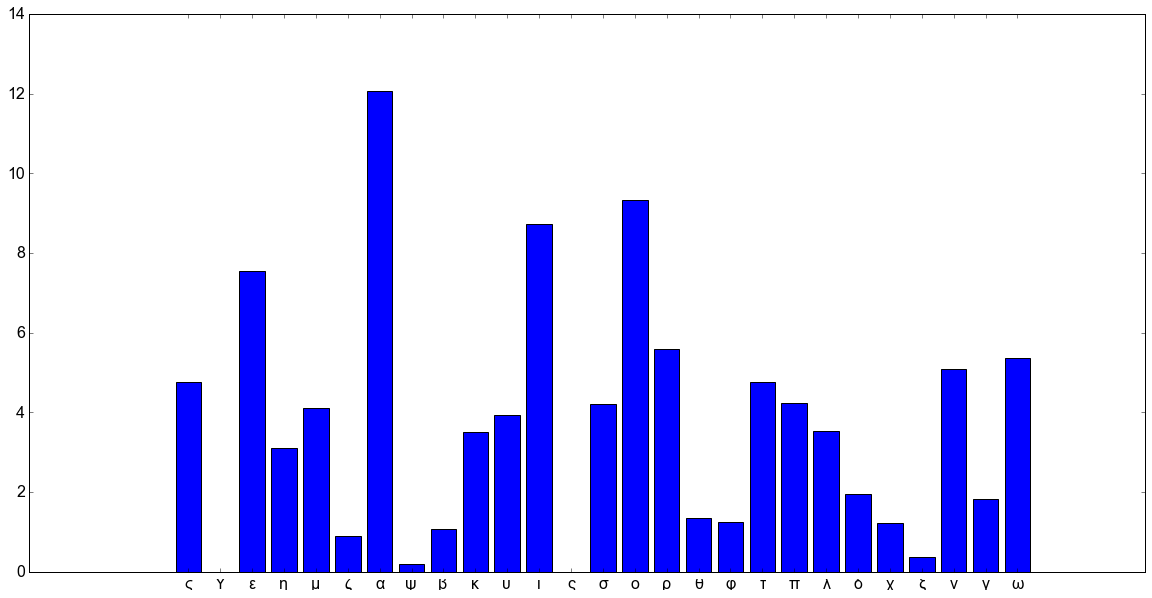

In [21]:
%matplotlib inline

import matplotlib
matplotlib.rc('font', family='Arial')
plt = matplotlib.pyplot

def plot(D):
    r = range(len(D))
    plt.figure(figsize=(20,10))
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.bar(r, D.values(), align='center')
    plt.xticks(r, list(D.keys()))
    plt.show()

plot(stats['grc'])

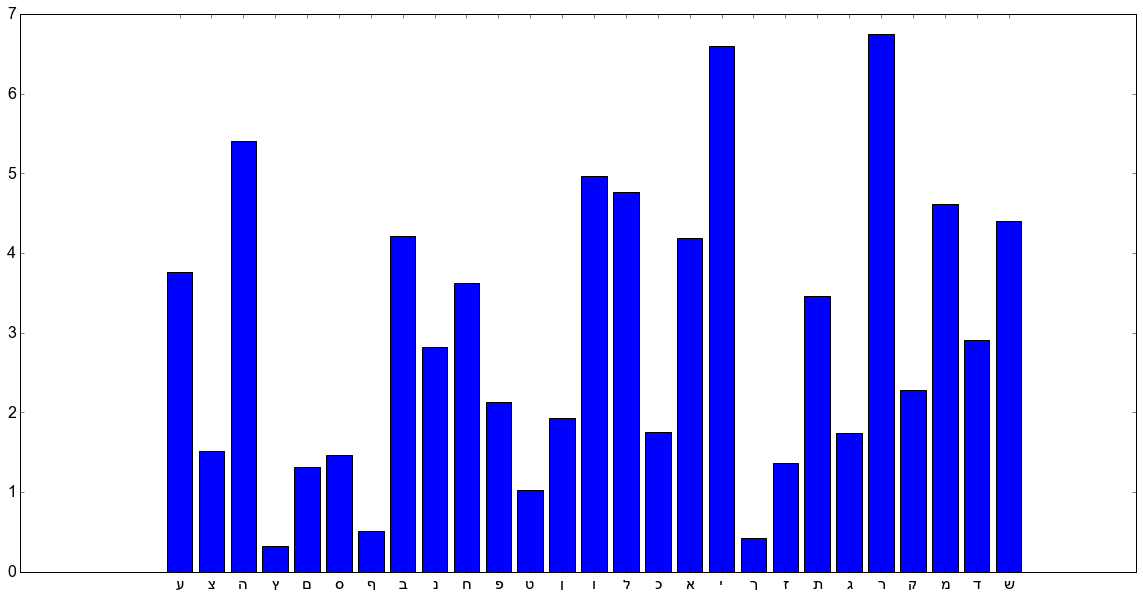

In [22]:
plot(stats['heb'])

## The [MIT](http://choosealicense.com/licenses/mit/) License

Copyright &copy; 2016 Marko Manninen